In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot  as plt


Tipologia di località 2001 o 2011. Il campo può assumere i seguenti valori:
1. centro abitato
2. nucleo abitato
3. località produttiva
4. case sparse

In [2]:
data_set = pd.read_pickle("dati_alberto.pkl")
# data_set.drop(columns=["station"], inplace=True)
data_set.drop(columns='index', inplace=True)
df_grid = pd.read_pickle("df_grid.pkl")
df_grid

,index,cellId,geometry,center,station,PRO_COM,SEZ,TIPO_LOC
0,1,39,"POLYGON ((10.92746 45.68179, 10.94029 45.68157...",POINT (10.93372 45.67718),T0405,22007.0,53.0,4.0
1,4,155,"POLYGON ((10.91493 45.69100, 10.92777 45.69079...",POINT (10.92119 45.68640),T0405,22007.0,53.0,4.0
2,5,156,"POLYGON ((10.92777 45.69079, 10.94060 45.69057...",POINT (10.93403 45.68618),T0405,22007.0,53.0,4.0
3,6,157,"POLYGON ((10.94060 45.69057, 10.95344 45.69035...",POINT (10.94686 45.68596),T0405,22007.0,36.0,4.0
4,7,158,"POLYGON ((10.95344 45.69035, 10.96627 45.69013...",POINT (10.95970 45.68574),T0405,22007.0,36.0,4.0
...,...,...,...,...,...,...,...,...
6349,6570,11336,"POLYGON ((11.80475 46.52767, 11.81777 46.52735...",POINT (11.81103 46.52301),T0437,22039.0,15.0,4.0
6350,6571,11337,"POLYGON ((11.81777 46.52735, 11.83080 46.52703...",POINT (11.82405 46.52269),T0437,22039.0,15.0,4.0
6351,6572,11452,"POLYGON ((11.79219 46.53698, 11.80521 46.53666...",POINT (11.79847 46.53232),T0437,21089.0,37.0,4.0
6352,6573,11453,"POLYGON ((11.80521 46.53666, 11.81824 46.53634...",POINT (11.81149 46.53200),T0437,22039.0,15.0,4.0


In [3]:
data_set.columns

Index(['cellId', 'geometry', 'center', 'station', 'LINESET', 'NR_UBICAZIONI',
       'month', 'day', 'hour', 'week', 'CONSUMI', 'TEMPERATURA', 'elevation',
       'PIOGGIA', 'precipitation', 'precipitations', 'PRO_COM', 'SEZ',
       'COD_MONT_D', 'COD_LOC', 'TIPO_LOC'],
      dtype='object')

In [4]:
week_days = {'week':['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'], 'week_n':[0, 1, 2, 3, 4, 5, 6]}
week_days_df = pd.DataFrame(data=week_days)
week_days_df

,week,week_n
0,mon,0
1,tue,1
2,wed,2
3,thu,3
4,fri,4
5,sat,5
6,sun,6


In [5]:
for ii in week_days_df.week_n:
    giorno = ii
    print(week_days_df[week_days_df.week_n==giorno].week[giorno])

mon
tue
wed
thu
fri
sat
sun


<AxesSubplot:>

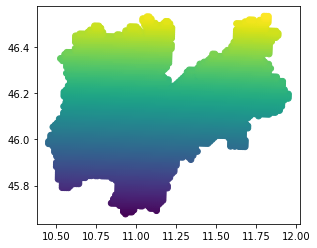

In [6]:
df_grid.plot('cellId')

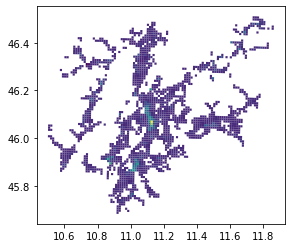

In [7]:
working_set = data_set.copy()
working_df_grid = df_grid.copy()
colonne = working_set.columns

consumi_cellId_serie = working_set.drop(columns=['center', 'LINESET', 'NR_UBICAZIONI', 'week', 'TEMPERATURA', 'elevation', 'PIOGGIA', 'precipitation', 'precipitations', 'PRO_COM', 'SEZ', 'COD_MONT_D', 'COD_LOC', 'TIPO_LOC']).copy()
consumi_cellId = consumi_cellId_serie.groupby(['cellId'], as_index=False).sum().copy()
del consumi_cellId_serie
consumi_cellId.drop(columns=['month', 'day', 'hour'], inplace=True)
consumi_cellId

consumi_cellId_geo = working_df_grid.merge(consumi_cellId, how='right', on='cellId').copy()
consumi_cellId_geo.drop(columns=['center'], inplace=True)
consumi_cellId_geo.plot('CONSUMI')
del working_set
del working_df_grid
del consumi_cellId

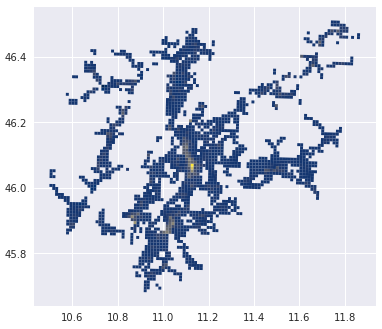

In [8]:
with plt.style.context('seaborn'):    
    consumi_cellId_geo.plot('CONSUMI', cmap='cividis')
plt.show()

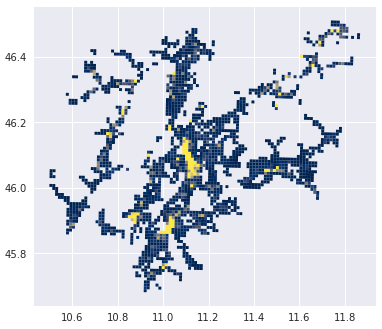

In [9]:
with plt.style.context('seaborn'):    
    consumi_cellId_geo.plot('CONSUMI',vmin=0, vmax=200000,cmap='cividis')
plt.show()

In [10]:
working_set = data_set.copy()
working_df_grid = df_grid.copy()

working_set.drop(columns=['TEMPERATURA', 'PIOGGIA', 'precipitation', 'precipitations', 'geometry', 'elevation', 'PRO_COM', 'LINESET', 'SEZ', 'COD_MONT_D', 'COD_LOC', 'NR_UBICAZIONI', 'center', 'cellId'], inplace=True)
tipo_localita = working_set.groupby(['month', 'day', 'hour', 'week', 'TIPO_LOC'], as_index = False).sum()

tipo_localita = pd.DataFrame(tipo_localita)
tipo_localita

,month,day,hour,week,TIPO_LOC,CONSUMI
0,11,1,0,fri,1.0,9979.134352
1,11,1,0,fri,2.0,255.223944
2,11,1,0,fri,3.0,1349.301234
3,11,1,0,fri,4.0,14003.472041
4,11,1,1,fri,1.0,9371.463742
...,...,...,...,...,...,...
5851,12,31,22,sun,4.0,25924.866867
5852,12,31,23,sun,1.0,13003.996073
5853,12,31,23,sun,2.0,382.033457
5854,12,31,23,sun,3.0,1020.298023


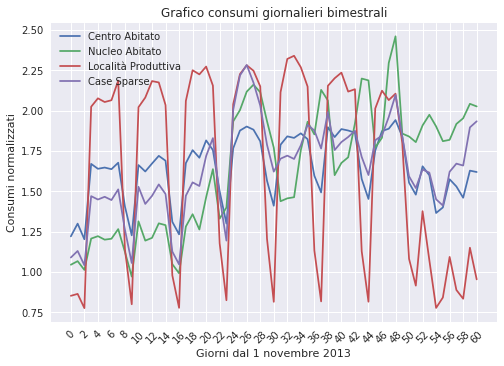

In [11]:
with plt.style.context('seaborn'):
    for tipo in range(1, 5):
        df = tipo_localita[tipo_localita.TIPO_LOC==tipo].copy()
        df = df.reset_index().copy()
        df = df.groupby(['month', 'day', 'week', 'TIPO_LOC'], as_index=False).sum().copy()
        df_tot = df.groupby('TIPO_LOC', as_index=False).sum().rename(columns={'CONSUMI':'TOTALE'}).copy()
        df = df.merge(df_tot, how='left', on='TIPO_LOC')
        plt.plot(df.index, df.CONSUMI/df.TOTALE*100)
    plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
    plt.xticks(range(0, max(df.index)+1, 2), range(0, max(df.index)+1, 2), rotation=45)
    plt.title("Grafico consumi giornalieri bimestrali")
    plt.xlabel("Giorni dal 1 novembre 2013")
    plt.ylabel("Consumi normalizzati")
plt.show()

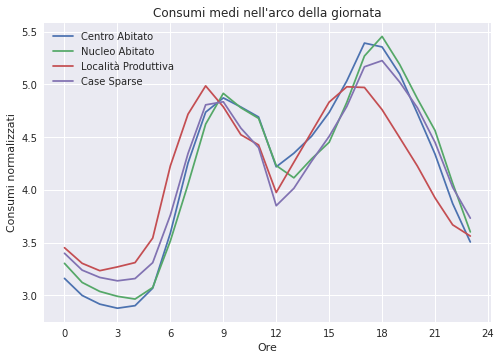

In [12]:
dataset_giornaliero = data_set.copy()
dataset_giornaliero.drop(columns=['geometry', 'COD_LOC', 'PRO_COM', 'SEZ', 'COD_MONT_D', 'center', 'LINESET', 'TEMPERATURA', 'elevation', 'PIOGGIA', 'precipitation', 'precipitations', 'NR_UBICAZIONI'], inplace=True)
dataset_giornaliero_week = dataset_giornaliero.merge(week_days_df, how='left', on='week').copy()
dataset_giornaliero = dataset_giornaliero_week.drop(columns=['week', 'week_n']).copy()
dataset_giornaliero = dataset_giornaliero.groupby(['cellId', 'TIPO_LOC', 'hour'], as_index=False).mean().drop(columns=['month', 'day']).copy()
dataset_giornaliero = dataset_giornaliero.groupby(['TIPO_LOC', 'hour'], as_index=False).sum().drop(columns='cellId').copy()

with plt.style.context('seaborn'):
    for tipo in range(1, 5):
        df = dataset_giornaliero[dataset_giornaliero.TIPO_LOC==tipo].copy()
        df = df.reset_index().copy()
        df_tot = df.groupby('TIPO_LOC', as_index=False).sum().drop(columns='hour').rename(columns={'CONSUMI':'TOTALE'}).copy()
        df = df.merge(df_tot, how='left', on='TIPO_LOC')
        plt.plot(df.index, df.CONSUMI/df.TOTALE*100)
    plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
    plt.xticks(list(range(0, 25, 3)))
    plt.title("Consumi medi nell'arco della giornata")
    plt.xlabel("Ore")
    plt.ylabel("Consumi normalizzati")
plt.show()

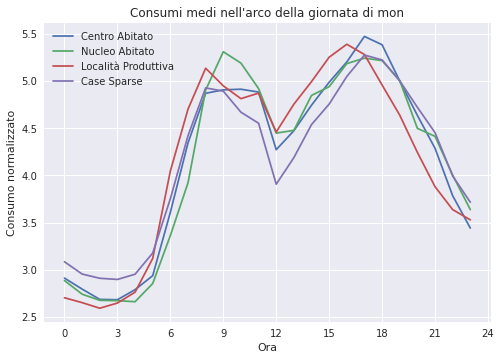

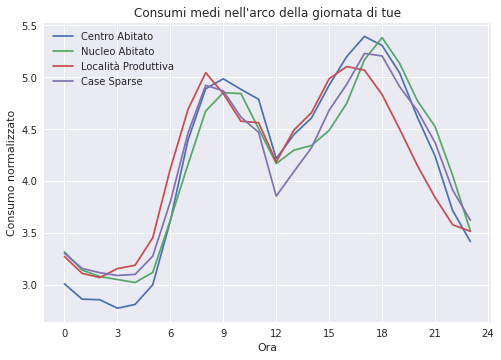

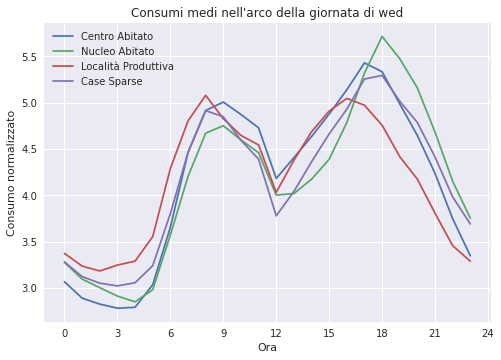

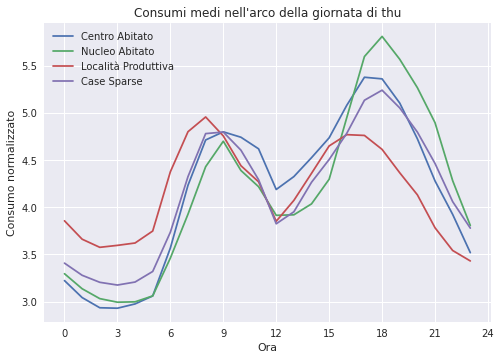

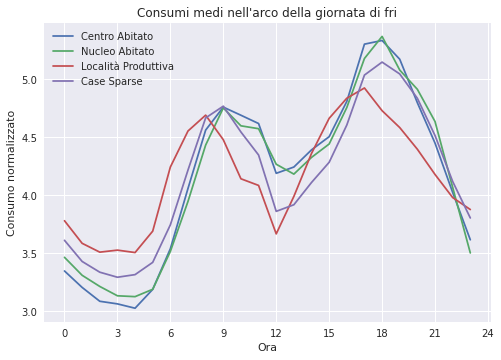

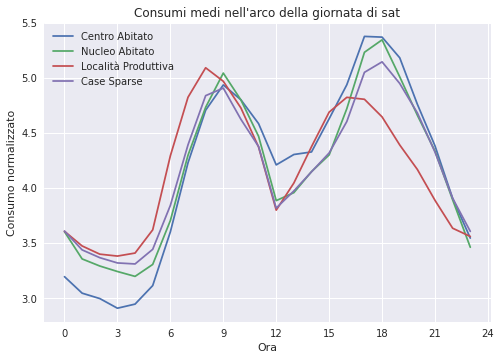

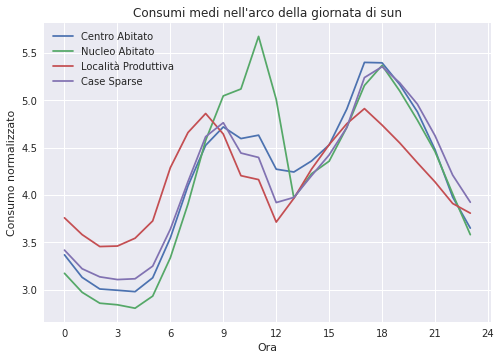

In [13]:
for giorno in range(7):
    day = dataset_giornaliero_week[dataset_giornaliero_week.week_n==giorno].week.copy()
    day = day.reset_index().drop(columns='index').copy()
    day = day.week[0]
    ds_daily = dataset_giornaliero_week[dataset_giornaliero_week.week_n==giorno].drop(columns=['week', 'week_n']).copy()
    ds_daily = ds_daily.groupby(['cellId', 'hour'], as_index=False).mean().copy()
    ds_daily = ds_daily.groupby(['hour', 'TIPO_LOC'], as_index=False).sum().drop(columns=['cellId', 'month', 'day']).copy()
    
    with plt.style.context('seaborn'):   
        for tipo in range(1, 5):
            df = ds_daily[ds_daily.TIPO_LOC==tipo].copy()
            df = df.reset_index().copy()
            df_tot = df.groupby('TIPO_LOC', as_index=False).sum().drop(columns='hour').rename(columns={'CONSUMI':'TOTALE'}).copy()
            df = df.merge(df_tot, how='left', on='TIPO_LOC')
            
            figura = plt.plot(df.index, df.CONSUMI/df.TOTALE*100)
        plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
        plt.xticks(list(range(0, 25, 3)))
        plt.xlabel("Ora")
        plt.ylabel("Consumo normalizzato")
        plt.title(str("Consumi medi nell'arco della giornata di "+day))
    plt.show()

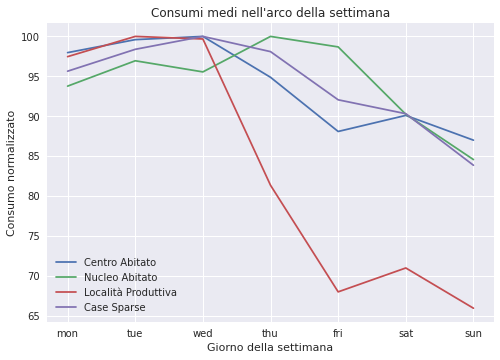

In [14]:
dataset_settimanale = data_set.copy()
dataset_settimanale.drop(columns=['TEMPERATURA', 'elevation', 'PIOGGIA', 'precipitations', 'PRO_COM', 'SEZ', 'COD_MONT_D', 'COD_LOC', 'NR_UBICAZIONI'], inplace=True)
dataset_settimanale = dataset_settimanale.groupby(['TIPO_LOC', 'month', 'day', 'hour', 'week'], as_index=False).sum().copy()
dataset_settimanale = dataset_settimanale.merge(week_days_df, how='left', on='week').copy()
dataset_settimanale.drop(columns='cellId', inplace=True)
dataset_settimanale = dataset_settimanale.groupby(['TIPO_LOC', 'week_n', 'week'], as_index=False).mean().copy()
dataset_settimanale.drop(columns=['month', 'day', 'hour'], inplace=True)

with plt.style.context('seaborn'):
    for tipo in range(1, 5):
        df = dataset_settimanale[dataset_settimanale.TIPO_LOC==tipo].copy()
        df = df.reset_index().drop(columns='index').copy()
        df_max = max(df.CONSUMI)#df.groupby('TIPO_LOC', as_index=False).sum().copy()
        plt.plot(df.week_n, df.CONSUMI/df_max*100)
    plt.xticks(df.week_n, df.week)
    plt.xlabel("Giorno della settimana")
    plt.ylabel("Consumo normalizzato")
    plt.title(str("Consumi medi nell'arco della settimana"))
    plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
plt.show()

In [15]:
# dataset_temperatura = data_set.copy()
# dataset_temperatura.drop(columns=['COD_LOC', 'cellId', 'geometry', 'center','PIOGGIA', 'elevation', 'COD_MONT_D', 'NR_UBICAZIONI', 'precipitation', 'precipitations', 'PRO_COM', 'SEZ'], inplace=True)
# dataset_temperatura = dataset_temperatura.groupby(['station', 'month', 'day', 'hour', 'week', 'TIPO_LOC'], as_index = False).agg().copy()

# for ii in range(len(dataset_temperatura.station)):
#     dataset_temperatura['station'][ii] = int(dataset_temperatura.station[ii][2:5])
    
# dataset_temperatura = dataset_temperatura.merge(week_days_df, how='left', on='week').copy()
# dataset_temperatura


In [16]:
# tipo = 3
# sett = 0
# ora = 4
# mese = 11

# dataset_temperatura_work = dataset_temperatura.copy()
# dataset_temperatura_work.drop(columns='week', inplace=True)


# dataset_temperatura_work_by_hourweektipo = dataset_temperatura_work[(dataset_temperatura_work.TIPO_LOC==tipo)&(dataset_temperatura_work.week_n==sett)&(dataset_temperatura_work.hour==ora)&(dataset_temperatura_work.month == mese)].copy()
# dataset_temperatura_work_by_hourweektipo_sorted = dataset_temperatura_work_by_hourweektipo.sort_values(by='TEMPERATURA')

# dataset_temperatura_work_by_hourweektipo_sorted.plot('TEMPERATURA', 'CONSUMI', grid=True)

# dataset_temperatura_work_by_hourweektipo_sorted

C:\Users\anank\.conda\envs\clone_trento_sociale\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


,month,day,hour,stazione,TEMPERATURA,week_n,TIPO_LOC,CONSUMI
0,12,2,0,32,3.400,5,1.0,51.912435
1,12,2,0,32,3.400,5,3.0,0.534684
2,12,2,0,32,3.400,5,4.0,278.688548
3,12,2,0,71,-2.625,5,1.0,247.030476
4,12,2,0,71,-2.625,5,2.0,8.249043
...,...,...,...,...,...,...,...,...
25490,12,30,23,437,-7.525,5,2.0,158.832391
25491,12,30,23,437,-7.525,5,4.0,1551.560978
25492,12,30,23,450,-8.000,5,4.0,128.769203
25493,12,30,23,469,-2.175,5,1.0,91.810533


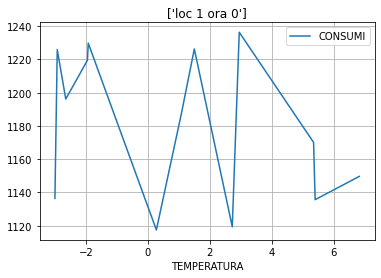

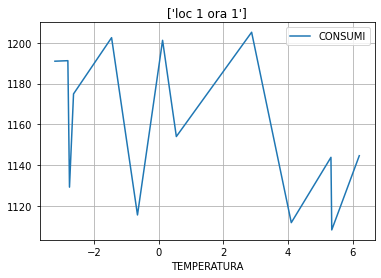

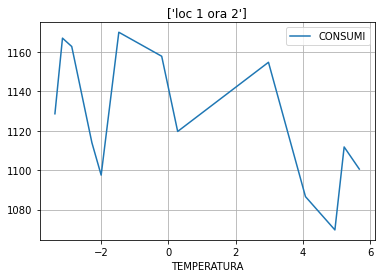

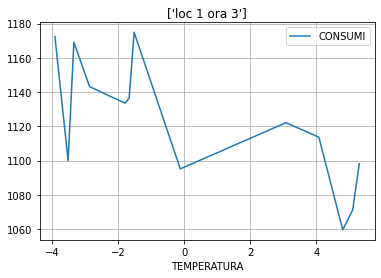

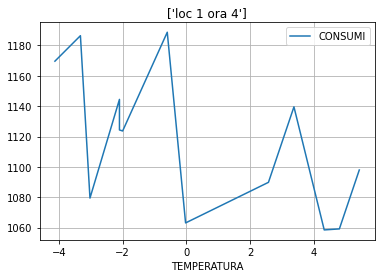

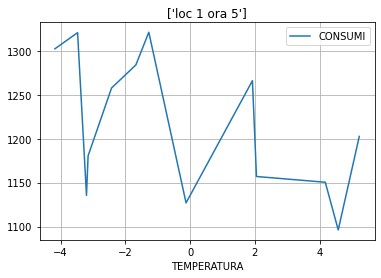

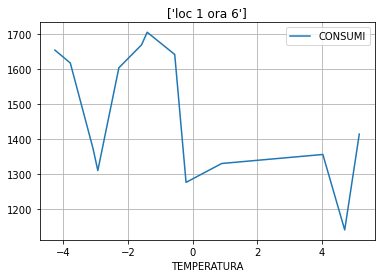

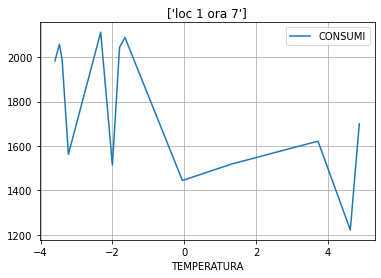

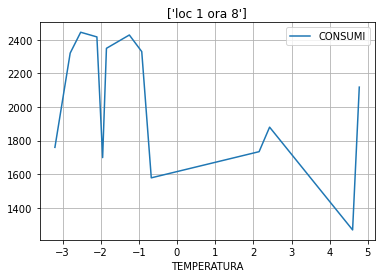

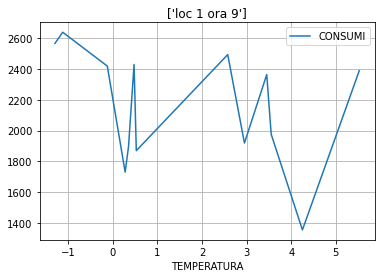

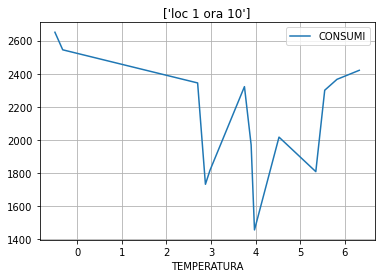

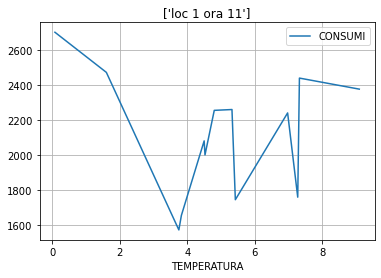

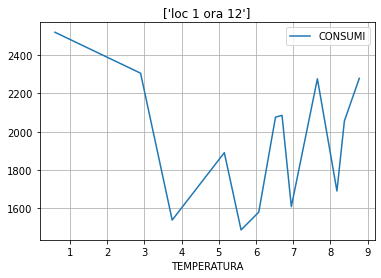

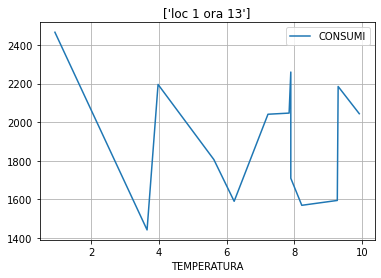

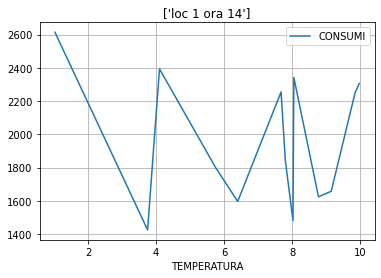

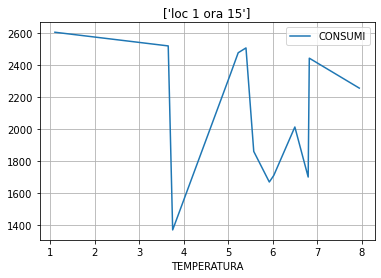

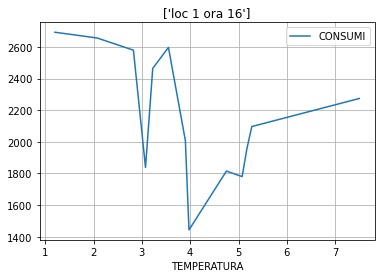

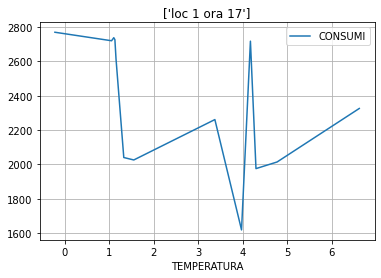

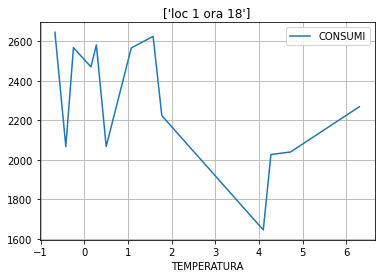

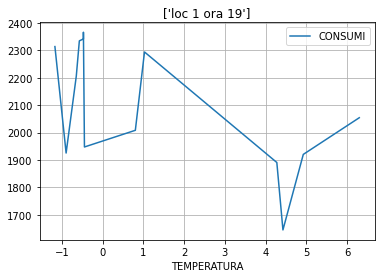

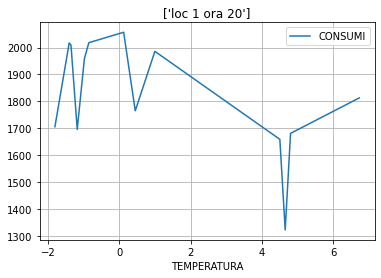

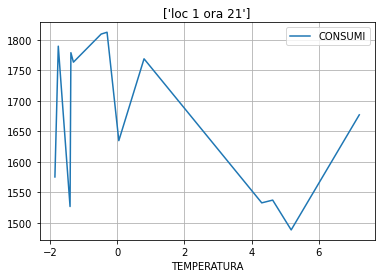

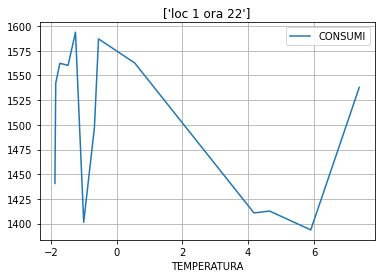

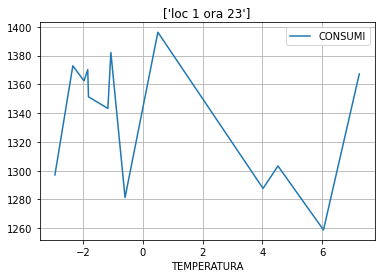

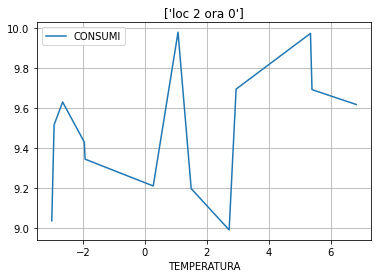

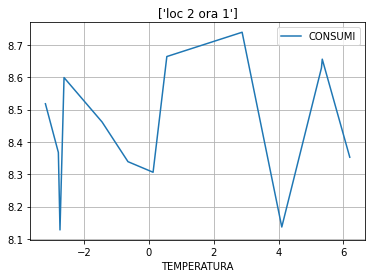

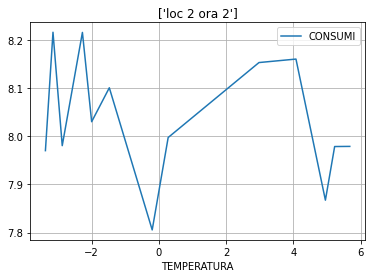

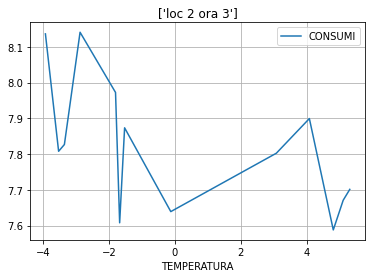

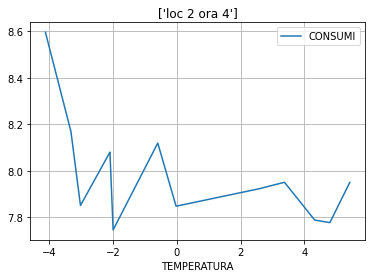

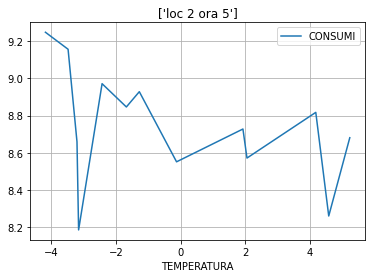

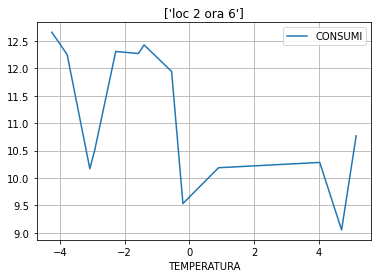

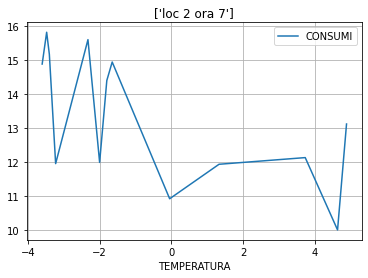

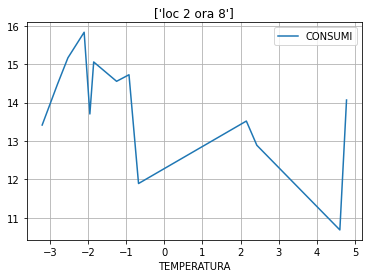

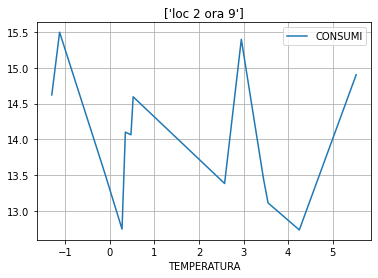

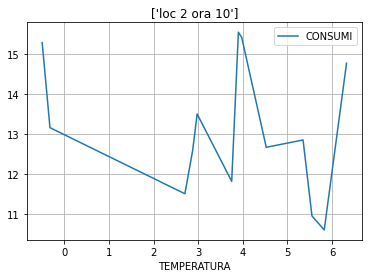

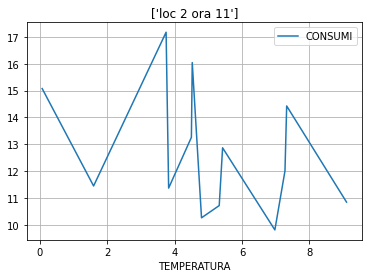

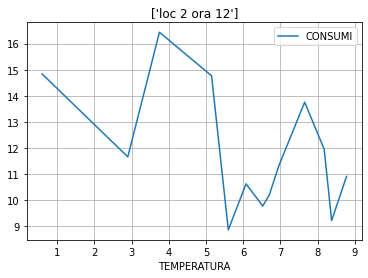

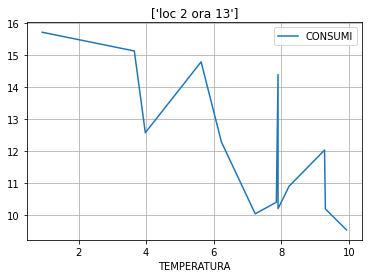

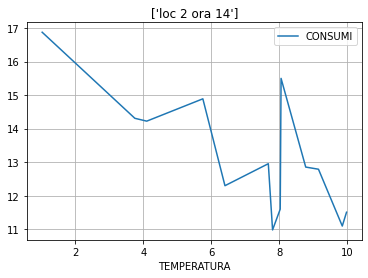

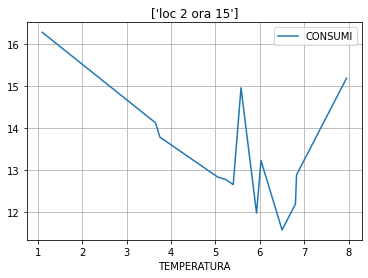

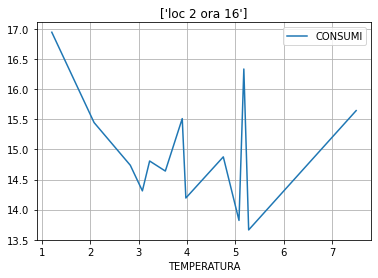

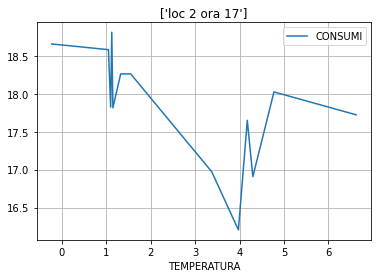

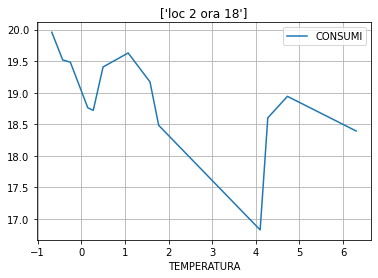

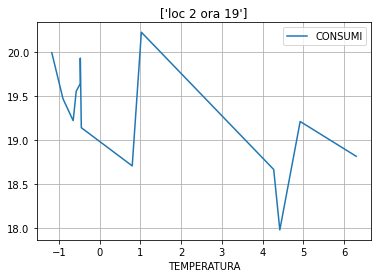

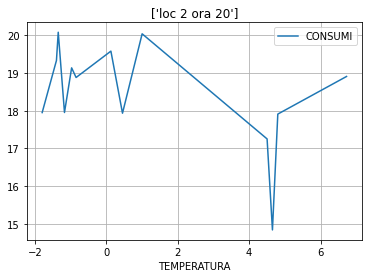

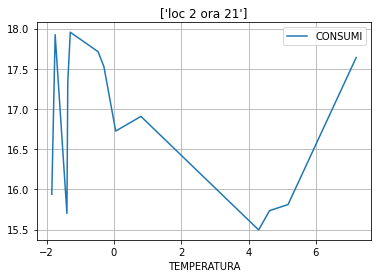

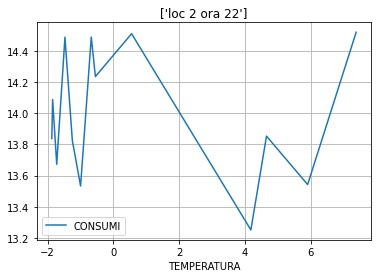

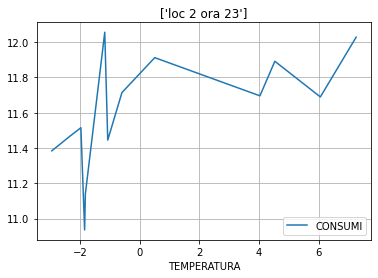

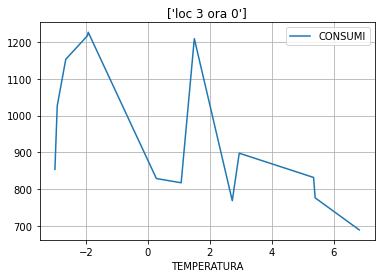

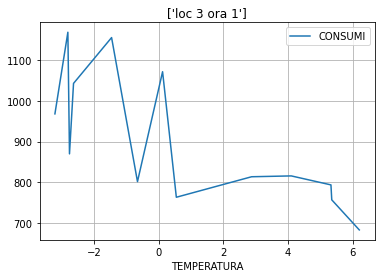

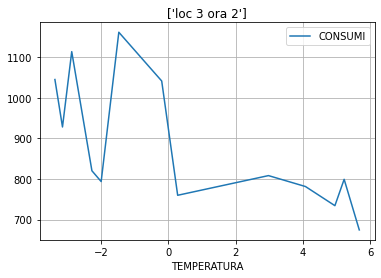

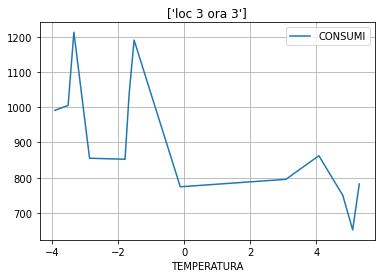

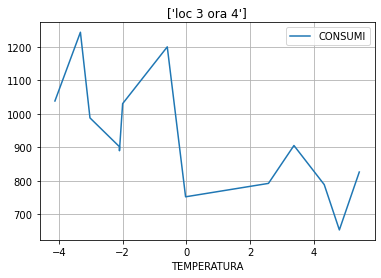

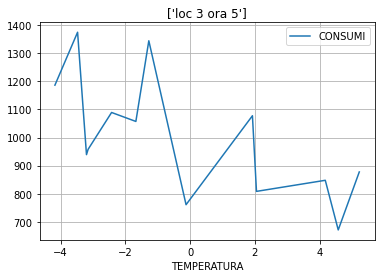

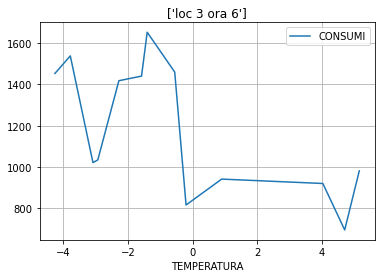

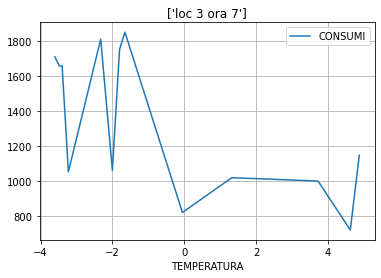

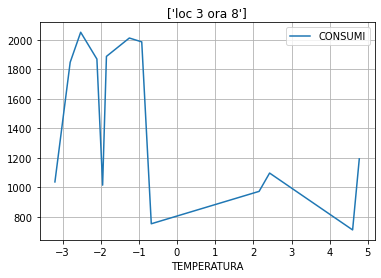

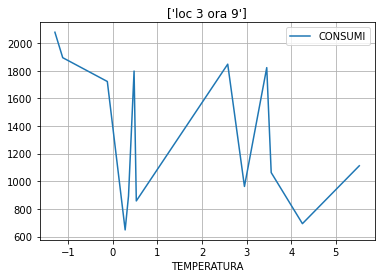

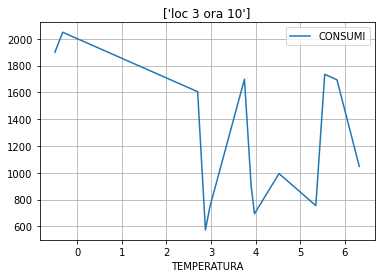

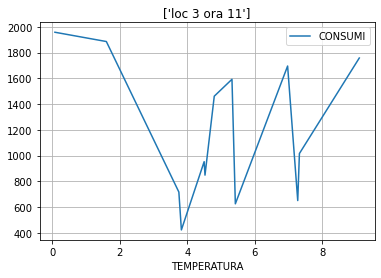

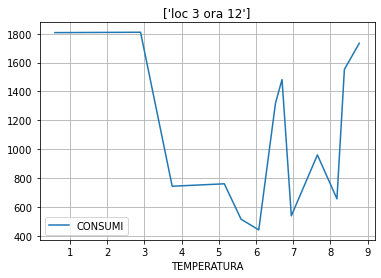

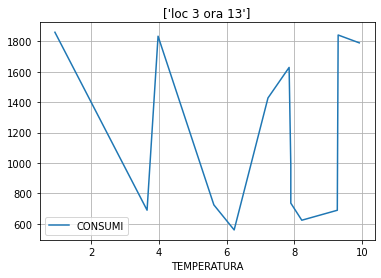

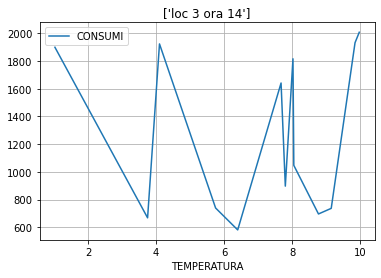

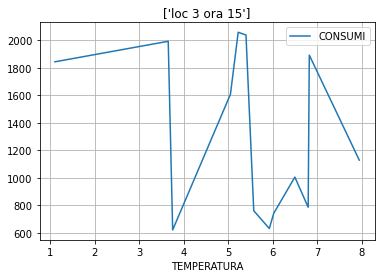

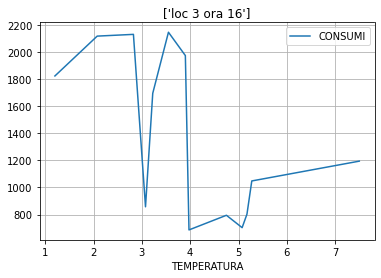

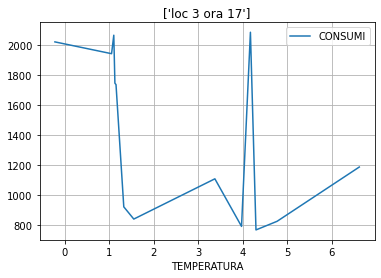

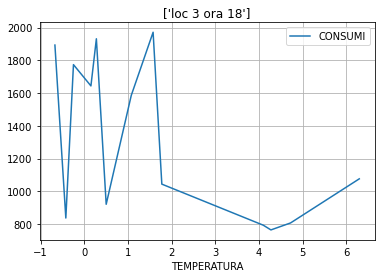

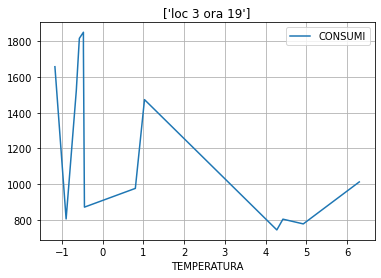

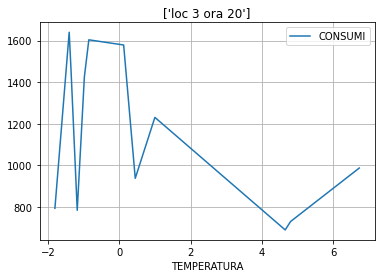

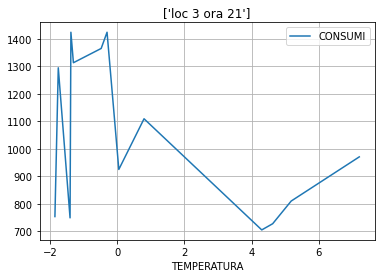

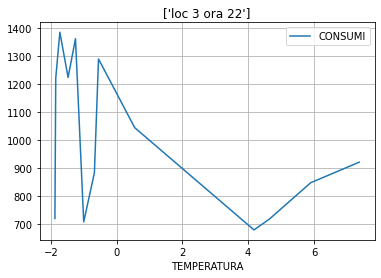

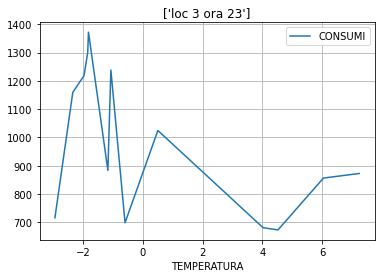

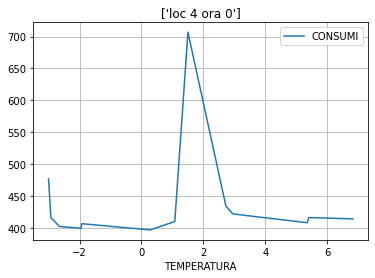

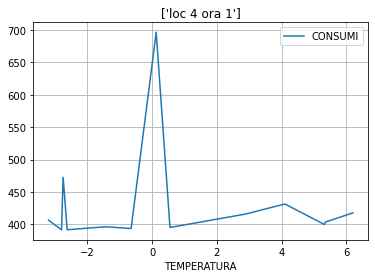

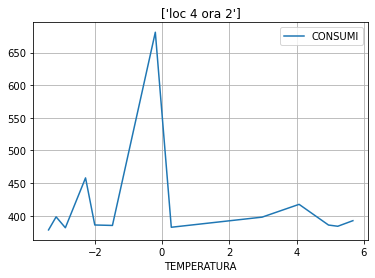

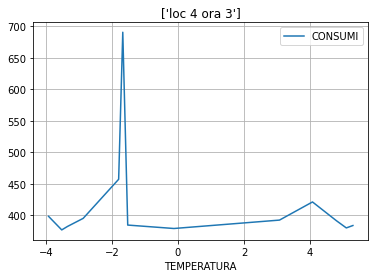

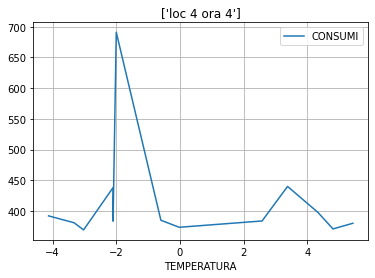

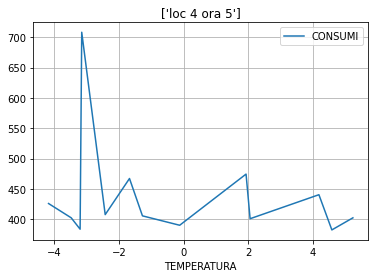

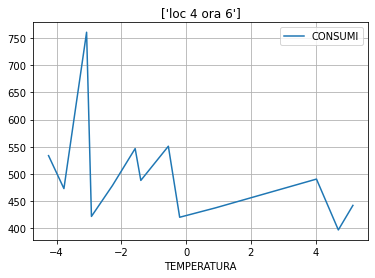

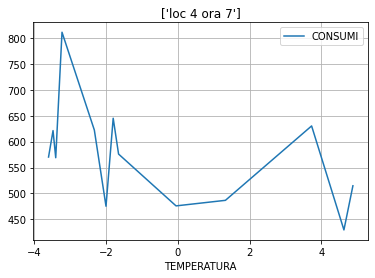

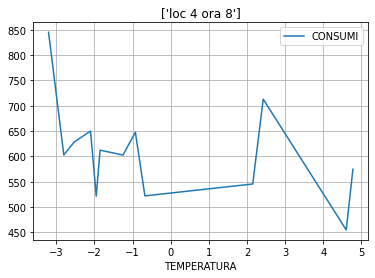

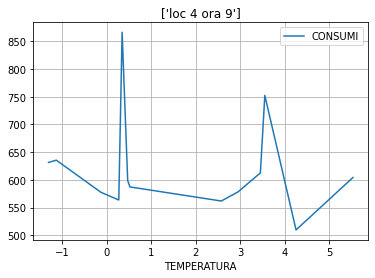

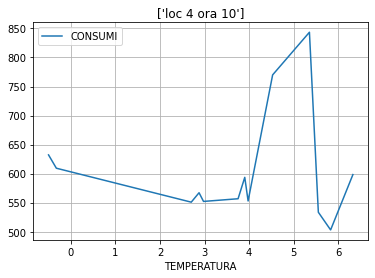

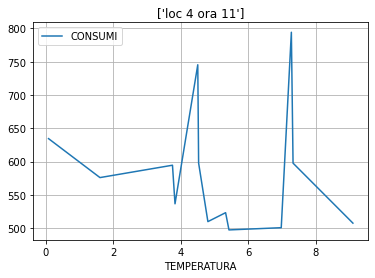

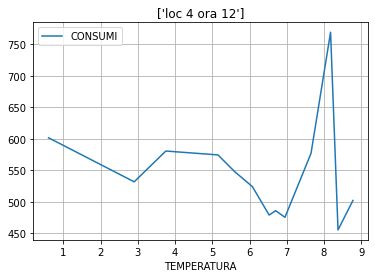

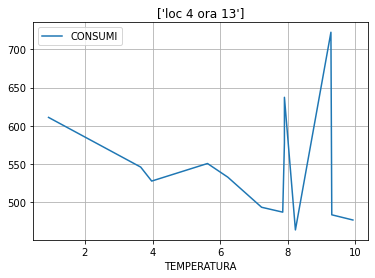

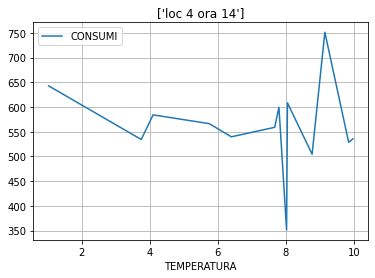

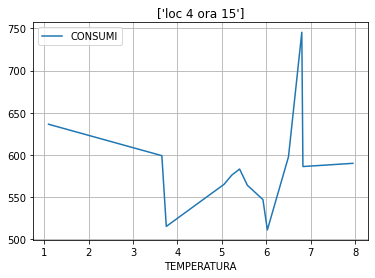

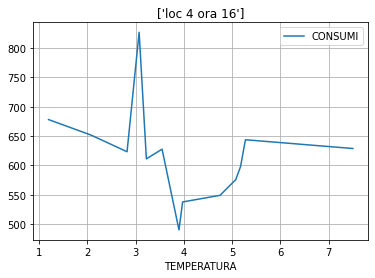

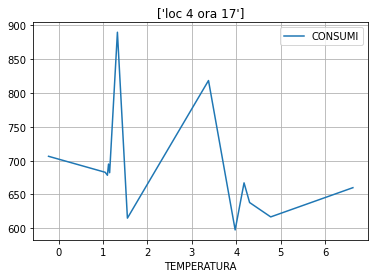

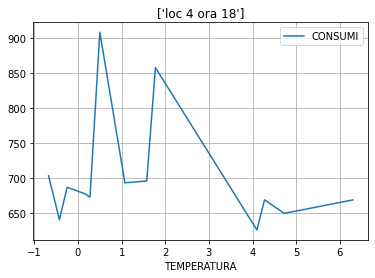

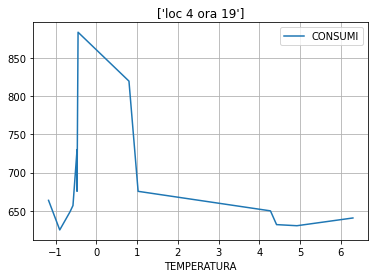

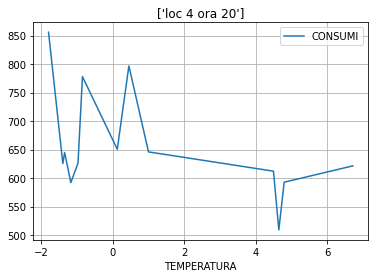

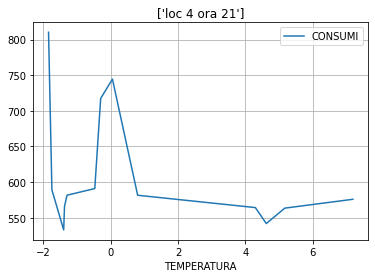

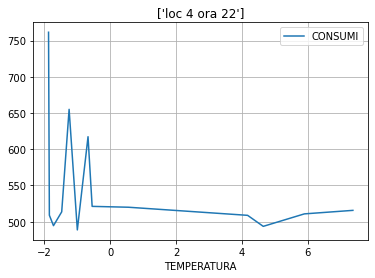

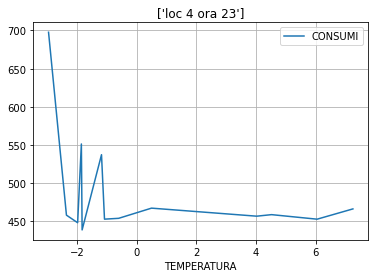

In [17]:
test = data_set.copy()
test.drop(columns=['elevation', 'COD_MONT_D', 'SEZ', 'COD_LOC', 'PRO_COM', 'cellId', 'geometry', 'center', 'LINESET', 'NR_UBICAZIONI', 'PIOGGIA', 'precipitation', 'precipitations'], inplace=True)
test = test.merge(week_days_df, how='left', on='week').copy()
test.drop(columns='week', inplace=True)
test['stazione'] = test['station'].str[-3:].astype(int).copy()
test.drop(columns='station', inplace=True)
test = test[(test.month==12)&(test.week_n)].copy() #| ((test.month==12)&(test.day<32))].copy()
test = test.groupby(['month', 'day', 'hour', 'stazione', 'TEMPERATURA', 'week_n', 'TIPO_LOC'], as_index=False).agg({'CONSUMI':'sum'}).copy()

stazioni = list(set(test.stazione))

              # 
giorno = 3              # 
tipo = 4                # 


stazione = stazioni[2]
mese = 11

for jj in range(1, 5):
    tipo = jj
    for ii in range(24):
        ora = ii
        #test = test[(test.week_n == giorno)&(test.month==mese)&(test.stazione == stazione)&(test.TIPO_LOC==tipo)&(test.hour == ora)].copy()
        test1  = test[(test.TIPO_LOC == tipo)&(test.stazione==stazione)&(test.hour==ora)].copy()
        #test.drop(columns=['week_n', 'stazione', 'month', 'TIPO_LOC', 'day', 'hour'], inplace=True)
        test1 = test1.sort_values(by='TEMPERATURA').copy()
        ax = test1.plot('TEMPERATURA', 'CONSUMI', grid=True, title=str(["loc "+str(tipo)+" ora "+str(ora)]))
        ax.set_xlim()

test

In [18]:
pioggia = data_set.copy()
pioggia.drop(columns=['geometry', 'center', 'TEMPERATURA', 'PRO_COM', 'SEZ', 'COD_MONT_D', 'COD_LOC'], inplace=True)
pioggia = pioggia[pioggia.precipitation==True]

    

pioggia

,cellId,station,LINESET,NR_UBICAZIONI,month,day,hour,week,CONSUMI,elevation,PIOGGIA,precipitation,precipitations,TIPO_LOC
24,155,T0405,DG1031221,4,11,2,0,sat,0.580174,170.0,0.0,True,NaN,4.0
25,155,T0405,DG1031221,4,11,2,1,sat,0.557217,170.0,0.0,True,NaN,4.0
26,155,T0405,DG1031221,4,11,2,2,sat,0.547130,170.0,0.0,True,NaN,4.0
27,155,T0405,DG1031221,4,11,2,3,sat,0.543304,170.0,0.0,True,NaN,4.0
28,155,T0405,DG1031221,4,11,2,4,sat,0.536696,170.0,0.0,True,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656297,11099,T0437,DG1013503,3,12,29,19,fri,2.542043,1465.0,0.1,True,NaN,4.0
3656298,11099,T0437,DG1013503,3,12,29,20,fri,2.216140,1465.0,0.0,True,NaN,4.0
3656299,11099,T0437,DG1013503,3,12,29,21,fri,2.006885,1465.0,0.0,True,NaN,4.0
3656300,11099,T0437,DG1013503,3,12,29,22,fri,1.662867,1465.0,0.0,True,NaN,4.0


In [19]:
# working_set = data_set.copy()
# working_df_grid = df_grid.copy()

# working_set.drop(columns=['TEMPERATURA', 'PIOGGIA', 'precipitation', 'precipitations', 'geometry', 'elevation', 'PRO_COM', 'LINESET', 'SEZ', 'COD_MONT_D', 'COD_LOC', 'NR_UBICAZIONI', 'station', 'center', 'cellId'], inplace=True)
# tipo_localita = working_set.groupby(['month', 'day', 'hour', 'week', 'TIPO_LOC'], as_index = False).sum()

# tipo_localita = pd.DataFrame(tipo_localita)

# tipo_localita1 = tipo_localita[tipo_localita.TIPO_LOC == 1].copy()
# tipo_localita2 = tipo_localita[tipo_localita.TIPO_LOC == 2].copy()
# tipo_localita3 = tipo_localita[tipo_localita.TIPO_LOC == 3].copy()
# tipo_localita4 = tipo_localita[tipo_localita.TIPO_LOC == 4].copy()
        
        
        
        
# andamento_sett_medio_nov_dic = tipo_localita.groupby(['month', 'week', 'TIPO_LOC'], as_index = False).sum()
# andamento_sett_medio_nov_dic.drop(columns=['day', 'hour'], inplace=True)
# # print(type(tipo_localita))

# # print(tipo_localita)

# # # tipo_localita1.plot(tipo_localita1.week, tipo_localita1.CONSUMI)
# # andamento_sett_medio_nov_dic[andamento_sett_medio_nov_dic.TIPO_LOC == 1].plot()

# def GraficoOrarioTipo(df, tipo):
#     tipo4 = df[df.TIPO_LOC == tipo].copy()
#     tipo4.drop(columns=['TIPO_LOC'], inplace=True)
#     tipo4_nov_ora = tipo4[tipo4.month == 11].copy()
#     tipo4_nov_ora['time'] = tipo4_nov_ora['day']+tipo4_nov_ora['hour']/24
#     tipo4_nov_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
#     tipo4_dec_ora = tipo4[tipo4.month == 12].copy()
#     tipo4_dec_ora['time'] = tipo4_dec_ora['day']+tipo4_dec_ora['hour']/24+30
#     tipo4_dec_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
#     tipo4_dec_ora = tipo4_nov_ora.append(tipo4_dec_ora).copy()
#     tipo4_dec_ora.plot('time', title=str('Grafico consumi orari zona tipo '+str(tipo)), grid=True)

# for ii in range(1, 5):
#     GraficoOrarioTipo(tipo_localita, ii)
    

In [20]:
# def GraficoGiornalieroTipo(df, tipo):
#     tipo4 = df[df.TIPO_LOC == tipo].copy()
#     tipo4.drop(columns=['TIPO_LOC'], inplace=True)
#     tipo4_nov = tipo4[tipo4.month == 11].copy()
#     tipo4_nov_giorno = tipo4_nov.groupby(['month', 'day', 'week'], as_index=False).sum()
#     tipo4_nov_giorno['time'] = tipo4_nov_giorno['day']
#     tipo4_nov_giorno.drop(columns=['month', 'day', 'hour'], inplace=True)
#     tipo4_dec = tipo4[tipo4.month == 12].copy()
#     tipo4_dec_giorno = tipo4_dec.groupby(['month', 'day', 'week'], as_index=False).sum()
#     tipo4_dec_giorno['time'] = tipo4_dec_giorno['day']+30
#     tipo4_dec_giorno.drop(columns=['month', 'day', 'hour'], inplace=True)
#     tipo4_tot_giorno = tipo4_nov_giorno.append(tipo4_dec_giorno).copy()
#     tipo4_tot_giorno.plot('time', title=str('Grafico consumi giornalieri zona tipo '+str(tipo)), grid=True)
    
# for ii in range(1, 5):
#     GraficoGiornalieroTipo(tipo_localita, ii)

In [21]:
# for ii in range(1, 5):
#     tipo = ii
#     tipo1 = tipo_localita[tipo_localita.TIPO_LOC == tipo].copy()
#     tipo1_giornaliero = tipo1.groupby(['month', 'day', 'week', 'TIPO_LOC'], as_index=False).sum().copy()
# #     tipo1_giornaliero.drop(columns='hour', inplace=True)
#     tipo1_mean_sett = tipo1_giornaliero.groupby(['month', 'week'], as_index=False).mean().copy()
#     tipo1_mean_sett.drop(columns='day', inplace=True)
#     tipo1_mean_sett = tipo1_mean_sett.merge(week_days_df, how='left', on='week')
#     tipo1_mean_sett.drop(columns='week', inplace=True)

#     tipo1_mean_sett_nov = tipo1_mean_sett[tipo1_mean_sett.month == 11].copy()
#     tipo1_mean_sett_nov.sort_values('week_n', inplace=True)
#     tipo1_mean_sett_nov.plot('week_n', 'CONSUMI', kind='line', grid=True, title=str('Grafico consumi settimanali di novembre zona tipo '+str(tipo)))
#     tipo1_mean_sett_dic = tipo1_mean_sett[tipo1_mean_sett.month == 12].copy()
#     tipo1_mean_sett_dic.sort_values('week_n', inplace=True)
#     tipo1_mean_sett_dic.plot('week_n', 'CONSUMI', kind='line', grid=True, title=str('Grafico consumi settimanali di dicembre zona tipo '+str(tipo)))
#     tipo1_mean_sett_dic
    
        
# with plt.style.context('seaborn'):
#     for tipo in range(1, 5):
#         df = tipo_localita[tipo_localita.TIPO_LOC==tipo].copy()
#         df = df.reset_index().copy()
#         df = df.groupby(['month', 'day', 'week', 'TIPO_LOC'], as_index=False).sum().copy()
#         df_tot = df.groupby('TIPO_LOC', as_index=False).sum().rename(columns={'CONSUMI':'TOTALE'}).copy()
#         df = df.merge(df_tot, how='left', on='TIPO_LOC')
#         plt.plot(df.index, df.CONSUMI/df.TOTALE*100)
#     plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
#     plt.xticks(range(0, max(df.index)+1, 2), range(0, max(df.index)+1, 2), rotation=45)
#     plt.title("Grafico consumi giornalieri bimestrali")
#     plt.xlabel("Giorni dal 1 novembre 2013")
#     plt.ylabel("Consumi normalizzati")
# plt.show()

In [22]:
# dataset_giornaliero = data_set.copy()
# dataset_giornaliero.drop(columns=['geometry', 'COD_LOC', 'PRO_COM', 'SEZ', 'COD_MONT_D', 'center', 'station', 'LINESET', 'TEMPERATURA', 'elevation', 'PIOGGIA', 'precipitation', 'precipitations', 'NR_UBICAZIONI'], inplace=True)
# dataset_giornaliero_week = dataset_giornaliero.merge(week_days_df, how='left', on='week').copy()
# dataset_giornaliero = dataset_giornaliero_week.drop(columns=['week', 'week_n']).copy()
# dataset_giornaliero = dataset_giornaliero.groupby(['cellId', 'TIPO_LOC', 'hour'], as_index=False).mean().drop(columns=['month', 'day']).copy()
# dataset_giornaliero = dataset_giornaliero.groupby(['TIPO_LOC', 'hour'], as_index=False).sum().drop(columns='cellId').copy()

# def ConsumiMediGiornalieri(df, tipo):
#     dataset_giornaliero_tipo = df[df.TIPO_LOC==tipo].copy()
#     dataset_giornaliero_tipo.drop(columns='TIPO_LOC', inplace=True)
#     dataset_giornaliero_tipo.plot('hour', 'CONSUMI', grid=True, title=str("Consumi medi nell'arco della giornata tipo "+str(tipo)))
    
# for ii in range(1, 5):
#     ConsumiMediGiornalieri(dataset_giornaliero, ii)
    
    
# with plt.style.context('seaborn'):
#     for tipo in range(1, 5):
#         df = dataset_giornaliero[dataset_giornaliero.TIPO_LOC==tipo].copy()
#         df = df.reset_index().copy()
#         df_tot = df.groupby('TIPO_LOC', as_index=False).sum().drop(columns='hour').rename(columns={'CONSUMI':'TOTALE'}).copy()
#         df = df.merge(df_tot, how='left', on='TIPO_LOC')
#         plt.plot(df.index, df.CONSUMI/df.TOTALE*100)
#     plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
#     plt.xticks(list(range(0, 25, 3)))
#     plt.title("Consumi medi nell'arco della giornata")
#     plt.xlabel("Ore")
#     plt.ylabel("Consumi normalizzati")
# plt.show()

In [23]:
# dataset_giornaliero_week

In [24]:
# def PlotGiornoSett(df, giorno, tipo):
#     ds_daily_lun = df[df.week_n==giorno].drop(columns=['week', 'week_n']).copy()
#     ds_daily_lun = ds_daily_lun.groupby(['cellId', 'hour'], as_index=False).mean().copy()
#     ds_daily_lun = ds_daily_lun.groupby(['hour', 'TIPO_LOC'], as_index=False).sum().drop(columns=['cellId', 'month', 'day']).copy()
#     ds_daily_lun_tipo1 = ds_daily_lun[ds_daily_lun.TIPO_LOC==tipo].drop(columns='TIPO_LOC').copy()
#     ds_daily_lun_tipo1.plot('hour', 'CONSUMI', grid=True, title=str('Consumi di '+week_days_df[week_days_df.week_n==giorno].week[giorno]+' in loc tipo '+str(tipo)))


# for ii in range(1, 5):
#     for jj in week_days_df.week_n:
#         PlotGiornoSett(dataset_giornaliero_week, jj, ii)
        
# for giorno in range(7):
#     day = dataset_giornaliero_week[dataset_giornaliero_week.week_n==giorno].week.copy()
#     day = day.reset_index().drop(columns='index').copy()
#     day = day.week[0]
#     ds_daily = dataset_giornaliero_week[dataset_giornaliero_week.week_n==giorno].drop(columns=['week', 'week_n']).copy()
#     ds_daily = ds_daily.groupby(['cellId', 'hour'], as_index=False).mean().copy()
#     ds_daily = ds_daily.groupby(['hour', 'TIPO_LOC'], as_index=False).sum().drop(columns=['cellId', 'month', 'day']).copy()
    
#     with plt.style.context('seaborn'):   
#         for tipo in range(1, 5):
#             df = ds_daily[ds_daily.TIPO_LOC==tipo].copy()
#             df = df.reset_index().copy()
#             df_tot = df.groupby('TIPO_LOC', as_index=False).sum().drop(columns='hour').rename(columns={'CONSUMI':'TOTALE'}).copy()
#             df = df.merge(df_tot, how='left', on='TIPO_LOC')
            
#             figura = plt.plot(df.index, df.CONSUMI/df.TOTALE*100)
#         plt.legend(['Centro Abitato', 'Nucleo Abitato', 'Località Produttiva', 'Case Sparse'])
#         plt.xticks(list(range(0, 25, 3)))
#         plt.xlabel("Ora")
#         plt.ylabel("Consumo normalizzato")
#         plt.title(str("Consumi medi nell'arco della giornata di "+day))
#     plt.show()

In [25]:
# # dataframe con consumi e popolazione totale per ogni categoria
# totali=grid.groupby(['category']).sum().drop(columns=['cellId'])
# # attacco al DF dei consumi la colonna category
# consumi2=consumi.merge(grid.loc[:,['cellId','category']], how='left', on='cellId')

# # plot 1 dei ciclo giornaliero
# consumi_hour=consumi2.groupby(['hour','category']).sum().drop(columns=['utenze','cellId'])
# consumi_hour=consumi_hour.reset_index(level=[1])
# with plt.style.context('seaborn'):
#     for cat in ['f','p','c','i']:
#         df=consumi_hour[consumi_hour['category']==cat]
#         plt.plot(df.index, df['consumi']/totali['consumi'][cat])
#     plt.legend(['f','p','c','i'])
#     plt.xticks([1,4,7,10,13,16,19,22],['1:00','4:00','7:00','10:00','13:00','16:00','19:00','22:00'])
#     plt.title('Consumi giornalieri')
# plt.show()



In [26]:
# tipo1 = tipo_localita[tipo_localita.TIPO_LOC == 1].copy()
# tipo1.drop(columns=['TIPO_LOC'], inplace=True)
# tipo1_nov_ora = tipo1[tipo1.month == 11].copy()
# tipo1_nov_ora['time'] = tipo1_nov_ora['day']+tipo1_nov_ora['hour']/24
# tipo1_nov_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo1_nov_ora.plot('time')
# tipo1_dec_ora = tipo1[tipo1.month == 12].copy()
# tipo1_dec_ora['time'] = tipo1_dec_ora['day']+tipo1_dec_ora['hour']/24+30
# tipo1_dec_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo1_dec_ora.plot('time')
# tipo1_tot_ora = tipo1_nov_ora.append(tipo1_dec_ora).copy()
# tipo1_tot_ora.plot('time', title=str('Grafico consumi orari zona tipo '+str(1)))

# tipo2 = tipo_localita[tipo_localita.TIPO_LOC == 2].copy()
# tipo2.drop(columns=['TIPO_LOC'], inplace=True)
# tipo2_nov_ora = tipo2[tipo2.month == 11].copy()
# tipo2_nov_ora['time'] = tipo2_nov_ora['day']+tipo2_nov_ora['hour']/24
# tipo2_nov_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo2_nov_ora.plot('time')
# tipo2_dec_ora = tipo2[tipo2.month == 12].copy()
# tipo2_dec_ora['time'] = tipo2_dec_ora['day']+tipo2_dec_ora['hour']/24+30
# tipo2_dec_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo2_dec_ora.plot('time')
# tipo2_tot_ora = tipo2_nov_ora.append(tipo2_dec_ora).copy()
# tipo2_tot_ora.plot('time', title=str('Grafico consumi orari zona tipo '+str(2)))

# tipo3 = tipo_localita[tipo_localita.TIPO_LOC == 3].copy()
# tipo3.drop(columns=['TIPO_LOC'], inplace=True)
# tipo3_nov_ora = tipo3[tipo3.month == 11].copy()
# tipo3_nov_ora['time'] = tipo3_nov_ora['day']+tipo3_nov_ora['hour']/24
# tipo3_nov_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo3_nov_ora.plot('time')
# tipo3_dec_ora = tipo3[tipo3.month == 12].copy()
# tipo3_dec_ora['time'] = tipo3_dec_ora['day']+tipo3_dec_ora['hour']/24+30
# tipo3_dec_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo3_dec_ora.plot('time')
# tipo3_dec_ora = tipo3_nov_ora.append(tipo3_dec_ora).copy()
# tipo3_dec_ora.plot('time', title=str('Grafico consumi orari zona tipo '+str(3)))

# tipo4 = tipo_localita[tipo_localita.TIPO_LOC == 4].copy()
# tipo4.drop(columns=['TIPO_LOC'], inplace=True)
# tipo4_nov_ora = tipo4[tipo4.month == 11].copy()
# tipo4_nov_ora['time'] = tipo4_nov_ora['day']+tipo4_nov_ora['hour']/24
# tipo4_nov_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo3_nov_ora.plot('time')
# tipo4_dec_ora = tipo4[tipo4.month == 12].copy()
# tipo4_dec_ora['time'] = tipo4_dec_ora['day']+tipo4_dec_ora['hour']/24+30
# tipo4_dec_ora.drop(columns=['month', 'day', 'hour'], inplace=True)
# # tipo3_dec_ora.plot('time')
# tipo4_dec_ora = tipo4_nov_ora.append(tipo4_dec_ora).copy()
# tipo4_dec_ora.plot('time', title=str('Grafico consumi orari zona tipo '+str(4)))

# tipo4_nov_ora